## 2.6 Organizational Chart

In [289]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

query phpMyAdmin recreate last organizational chart matching "emp_no"and "to_date" from salaries and titles tables

SELECT * FROM salaries LEFT JOIN titles ON Salaries.emp_no=titles.emp_no AND Salaries.to_date=titles.to_date 

In [290]:
address = 'C:/Users/Moanesga/Desktop/Data/salaries&titles_query.csv'
org_chart = pd.read_csv(address,delimiter= ',')
org_chart.columns = ['emp_no','salary','from_date','to_date','emp_no2','title','from_date2','to_date2']
org_chart.head(5)

,emp_no,salary,from_date,to_date,emp_no2,title,from_date2,to_date2
0,10001,60117,1986-06-26,1987-06-26,NaN,NaN,NaN,NaN
1,10001,62102,1987-06-26,1988-06-25,NaN,NaN,NaN,NaN
2,10001,66074,1988-06-25,1989-06-25,NaN,NaN,NaN,NaN
3,10001,66596,1989-06-25,1990-06-25,NaN,NaN,NaN,NaN
4,10001,66961,1990-06-25,1991-06-25,NaN,NaN,NaN,NaN


In [291]:
org_chart_1 = org_chart.filter(items = ['emp_no','salary','title'])
org_chart_2 = org_chart_1.dropna(subset = ['emp_no','salary','title'])
org_chart_2.head(5)

,emp_no,salary,title
16,10001,88958,Senior Engineer
22,10002,72527,Staff
29,10003,43311,Senior Engineer
45,10004,74057,Senior Engineer
58,10005,94692,Senior Staff


In [292]:
org_chart_3 = org_chart_2.groupby('title',as_index=True)['salary'].mean()
org_chart_4 = pd.DataFrame(org_chart_3, columns =['salary'])
org_chart_5 = org_chart_4.sort_values('salary',ascending=False)
org_chart_5

,salary
title,
Senior Staff,79730.084987
Manager,77723.666667
Senior Engineer,69778.756139
Staff,65839.231727
Technique Leader,65458.929575
Engineer,57697.700106
Assistant Engineer,55889.497690


Confirming organizational chart was the same at starting operation date in records

SELECT * FROM salaries LEFT JOIN titles ON Salaries.emp_no=titles.emp_no AND Salaries.from_date=titles.from_date

In [293]:
address_2 = 'C:/Users/Moanesga/Desktop/Data/salaries&titles_query_2.csv'
org_chart_6 = pd.read_csv(address_2,delimiter= ',')
org_chart_6.columns = ['emp_no','salary','from_date','to_date','emp_no2','title','from_date2','to_date2']
org_chart_6.head(5)

,emp_no,salary,from_date,to_date,emp_no2,title,from_date2,to_date2
0,10001,60117,1986-06-26,1987-06-26,10001.0,Senior Engineer,1986-06-26,9999-01-01
1,10001,62102,1987-06-26,1988-06-25,NaN,NaN,NaN,NaN
2,10001,66074,1988-06-25,1989-06-25,NaN,NaN,NaN,NaN
3,10001,66596,1989-06-25,1990-06-25,NaN,NaN,NaN,NaN
4,10001,66961,1990-06-25,1991-06-25,NaN,NaN,NaN,NaN


In [294]:
org_chart_7 = org_chart_6.filter(items = ['emp_no','salary','title'])
org_chart_8 = org_chart_7.dropna(subset = ['emp_no','salary','title'])
org_chart_8.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
17,10002,65828,Staff
23,10003,40006,Senior Engineer
30,10004,40054,Engineer
46,10005,78228,Staff


In [295]:
org_chart_9 = org_chart_8.groupby('title',as_index=True)['salary'].mean()
org_chart_10 = pd.DataFrame(org_chart_9, columns =['salary'])
org_chart_11 = org_chart_10.sort_values('salary',ascending=False)
org_chart_11

,salary
title,
Senior Staff,58558.332131
Staff,58465.500955
Manager,57290.777778
Technique Leader,48580.975053
Engineer,48548.299645
Assistant Engineer,48493.204786
Senior Engineer,48437.754670


In [296]:
import scipy 
from scipy import stats

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

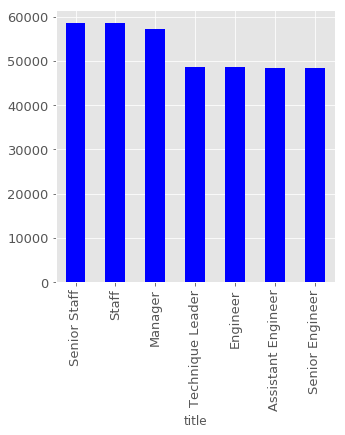

In [297]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 5, 5

ax = org_chart_11['salary'].plot(kind='bar',color = 'blue',fontsize=13)

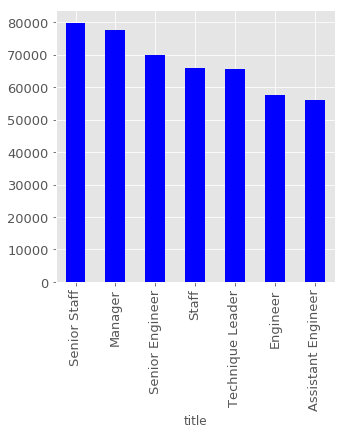

In [298]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 5, 5

ax = org_chart_5['salary'].plot(kind='bar',color = 'blue',fontsize=13)

In [299]:
# Finding out rate growth per title 
#to establish project rate growth per year 

address_3 = 'C:/Users/Moanesga/Desktop/Data/titles.csv'
titles = pd.read_csv(address_3)

titles.columns = ['emp_no','title','from_date','to_date']
titles.head(5)


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [300]:
titles['from_date'] = pd.to_datetime(titles['from_date'])

In [301]:
date = pd.Timestamp('2003-08-01')
titles.iloc[:, 3] = pd.to_datetime(titles.iloc[:, 3], errors='coerce').fillna(date)
titles.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,2003-08-01
1,10002,Staff,1996-08-03,2003-08-01
2,10003,Senior Engineer,1995-12-03,2003-08-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,2003-08-01


In [302]:
hire_date = pd.DataFrame(titles, columns =['emp_no','title','from_date'])
hire_date['year'] = hire_date['from_date'].dt.year
hire_date.head()

,emp_no,title,from_date,year
0,10001,Senior Engineer,1986-06-26,1986
1,10002,Staff,1996-08-03,1996
2,10003,Senior Engineer,1995-12-03,1995
3,10004,Engineer,1986-12-01,1986
4,10004,Senior Engineer,1995-12-01,1995


In [303]:
hire_date_1 = hire_date.groupby(['year','title'])['emp_no'].count()
hire_date_2 = pd.DataFrame(hire_date_1,columns =['emp_no']) 
hire_date_3 = hire_date_2.reset_index()
hire_date_4 = pd.DataFrame(hire_date_3,columns =['year','title','emp_no'] )
hire_date_4.head()

,year,title,emp_no
0,1985,Assistant Engineer,948
1,1985,Engineer,6472
2,1985,Manager,9
3,1985,Senior Engineer,1835
4,1985,Senior Staff,1665


In [304]:
p = pd.pivot_table(hire_date_4,values ='emp_no',index = ['year'],columns = 'title',fill_value=0)
p.head()

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
year,,,,,,,
1985,948,6472,9,1835,1665,6467,897
1986,989,6914,0,2017,1733,7169,1056
1987,980,7125,0,2051,1738,7136,957
1988,976,7023,2,2073,1825,7195,1013
1989,1047,7058,2,2050,1758,7363,1036


Text(0.5,0,'Year')

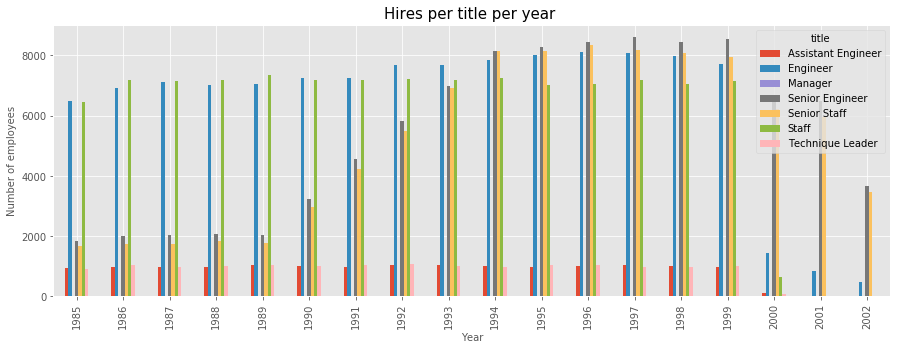

In [305]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 5

ax1 = p.plot(kind='bar')
plt.title("Hires per title per year ",fontsize=15, color='black')

ax1.set_ylabel("Number of employees", fontsize=10)
ax1.set_xlabel("Year", fontsize=10)

In [306]:
# Filtering Senior Engineer hires because this title will be "project owner", 
# consequentely defining project rate growth (also capacity) over the time
p_1 = pd.DataFrame(p, columns=['Senior Engineer'])
p_2 = p_1.reset_index()
p_2.head()

,year,Senior Engineer
0,1985,1835
1,1986,2017
2,1987,2051
3,1988,2073
4,1989,2050


In [307]:
# fitting linear regression 
from scipy.stats import linregress
linregress(p_2['year'],p_2['Senior Engineer'])

LinregressResult(slope=362.00619195046443, intercept=-716228.78809769533, rvalue=0.71061563376650394, pvalue=0.00094882902754595347, stderr=89.60556874253659)

Formula linear regression  y= a + mx,
Senior Engineer hires per year= -716228.78 + 362*year

In [308]:
# Trial and error fitting number of proyects 
# depending of Senior Engineer hires
p_2['N°_projects'] = p_2['Senior Engineer']/480
p_2['N°_projects_rnd'] = p_2['N°_projects'].round()
p_2['N°_projects_rnd'].sum()

205.0

In [309]:
#They dot have same slope but same rvaue
linregress(p_2['year'],p_2['N°_projects'])

LinregressResult(slope=0.75417956656346763, intercept=-1492.1433085368653, rvalue=0.71061563376650394, pvalue=0.00094882902754595347, stderr=0.18667826821361788)

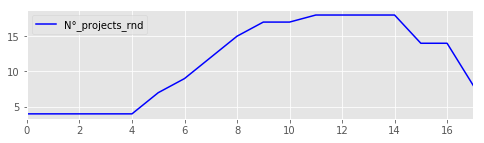

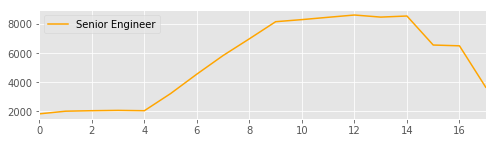

In [310]:
#plot
%matplotlib inline
rcParams['figure.figsize'] = 8, 2

p_2[['N°_projects_rnd']].plot(color='blue')
p_2[['Senior Engineer']].plot(color='orange')

plt.show()

In [266]:
p_2.head()

,year,Senior Engineer,N°_projects,N°_projects_rnd
0,1985,1835,3.822917,4.0
1,1986,2017,4.202083,4.0
2,1987,2051,4.272917,4.0
3,1988,2073,4.318750,4.0
4,1989,2050,4.270833,4.0
